# Color Palettes

Color is a very common encoding for variables, for both qualitative and quantitative variables. 

color for category in a clustered bar chart

color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart)

If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's FacetGrid class.

Major color palettes

1. Qualitative - geared towards nominal data. They have distinct hues with fairly similar brightness and saturation. No ordering is implied and individual levels aren't perceived to be more important than others.
2. Sequential - Used for ordinal and numeric data. Low values are indicated by a lighter, less saturated colors while high values are indicated by darker, more saturated colors. A single or small range of hues is used. 
3. Divergent - Used for certain ordinal or numeric data that have a meaningful center point. It is essentially two diverging palettes with distinct hues put back to back with the connecting color at the center point. 

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

## Qualitative palettes

In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.



In [2]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

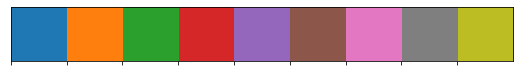

In [6]:
sb.palplot(sb.color_palette(n_colors=9))

## sequential palette

For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. In a sequential palette, consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

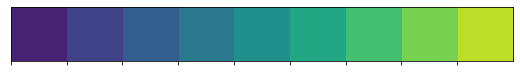

In [7]:
sb.palplot(sb.color_palette('viridis', 9))

## diverging palette

Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is a meaningful zero or center value for the variable, you may want to consider using a diverging palette. In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center

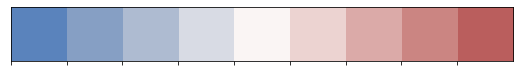

In [8]:
sb.palplot(sb.color_palette('vlag', 9))

## Selecting Color Palettes

If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn. This part of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:

- Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'

- Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)

- Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in FacetGrid through the "palette" parameter, and in scatter through the "cmap" parameter.

In [9]:
# import data
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [10]:
# data info
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [11]:
# data head
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [12]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x : x.split()[0])

In [13]:
# get a sample of the data
from dataclasses import replace


np.random.seed(2018)
sample= np.random.choice(fuel_econ.shape[0], 200, replace=False)
fuel_econ_subset = fuel_econ.loc[sample]

In [14]:
fuel_econ_subset.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
872,33923,Subaru,Impreza AWD,2014,Compact Cars,All-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.5,...,96,16.7674,20.8845,22.5537,31.4599,18.9559,468,4,4,Manual
1663,35337,Hyundai,Veloster,2015,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,90,25.9773,33.7198,34.1136,49.5544,29.1006,301,7,7,Manual
2428,36881,Ford,Mustang,2016,Subcompact Cars,Rear-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,...,0,18.7011,23.4925,27.3436,38.7800,21.8020,410,5,5,Automatic
1180,34466,Porsche,911 Targa 4,2014,Minicompact Cars,4-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.4,...,0,18.3385,23.0000,25.8687,36.5000,21.1028,422,5,5,Manual
853,33852,Cadillac,XTS AWD,2014,Large Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,104,15.9536,19.8000,23.7068,33.2000,18.7067,475,4,4,Automatic


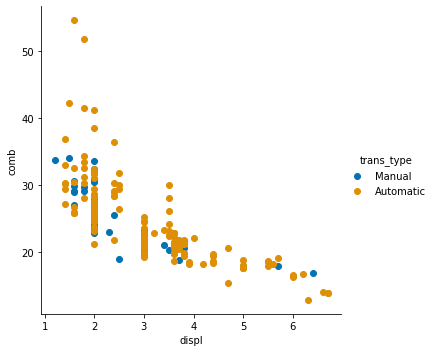

In [17]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', height = 5,
                 palette = 'colorblind');
g.map(plt.scatter, 'displ', 'comb');
g.add_legend();

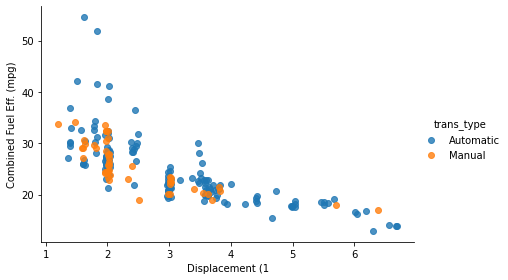

In [20]:
g= sb.FacetGrid(data=fuel_econ_subset, hue='trans_type', hue_order=['Automatic', 'Manual'], height=4, aspect=1.5)
g=g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
g.add_legend();
plt.xlabel('Displacement (1');
plt.ylabel('Combined Fuel Eff. (mpg)');

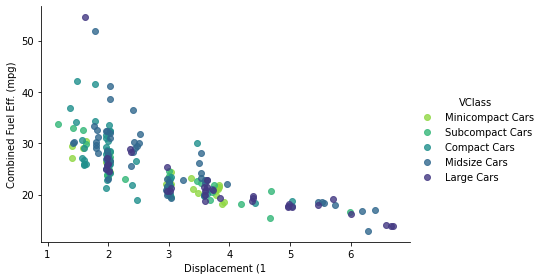

In [21]:
g= sb.FacetGrid(data=fuel_econ_subset, hue='VClass', height=4, aspect=1.5, palette='viridis_r')
g=g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False);
g.add_legend();
plt.xlabel('Displacement (1');
plt.ylabel('Combined Fuel Eff. (mpg)');

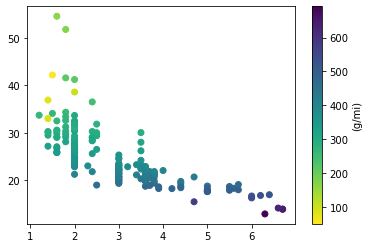

In [24]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2', cmap='viridis_r');
plt.colorbar(label='(g/mi)');